In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from astropy import units as u
import blimpy as bl

import setigen as stg

bshuf filter already loaded, skip it.
lz4 filter already loaded, skip it.
zfp filter already loaded, skip it.


In [2]:
# Sometimes it can be necessary to re-run this command for plots to show automatically
%matplotlib inline

827392


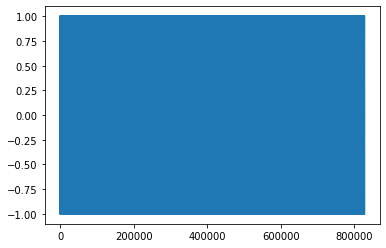

0.9999999999999999 0.0009790690638448315
(25, 8192)


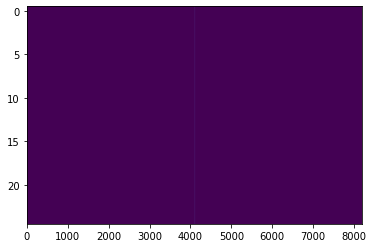

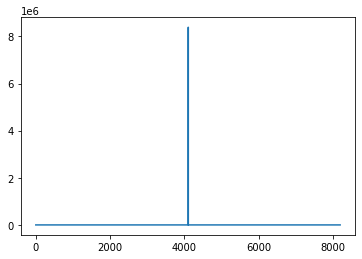

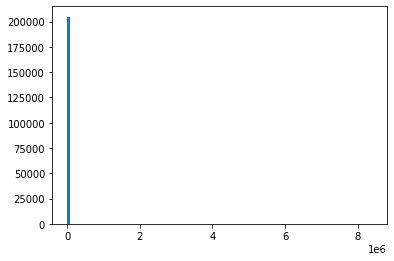

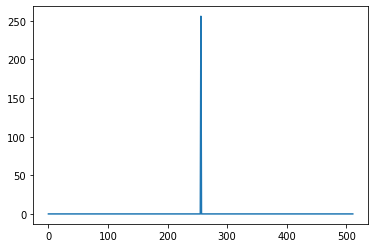

204800.19850356082
413696.0


(1024.0009925178053, 92676.24298583841)

In [26]:
num_taps = 8
num_branches = 1024
num_windows = 100
num_samples = num_taps * num_branches * (num_windows + 1)

fftlength = 32
int_factor = 1
print(num_samples)

sample_rate = 1

dt = 1 / sample_rate
t = np.linspace(0, dt * num_samples, num_samples, endpoint=False)
# f_start = sample_rate / 4
y = np.cos(2*np.pi*(sample_rate/4)*t)
# y = np.random.normal(0, 1, num_samples)
plt.plot(y)
plt.show()

filterbank = stg.voltage.PolyphaseFilterbank(num_taps=8, 
                                             num_branches=1024)

Ypfb = filterbank.channelize(y)

wf_data = stg.voltage.get_pfb_waterfall(Ypfb, fftlength=fftlength, int_factor=int_factor)
print(wf_data.shape)

plt.imshow(wf_data, aspect='auto')
plt.show()

spec = np.mean(wf_data, axis=0)
plt.plot(spec)
plt.show()

plt.hist(wf_data.flatten(), bins=100)
plt.show()

coarse_spec = np.mean(np.abs(Ypfb)**2/num_branches, axis=0)
plt.plot(coarse_spec)
plt.show()

print(np.sum(np.abs(Ypfb)**2/num_branches))

print(np.sum(y**2))

np.mean(wf_data), np.std(wf_data)

In [5]:
A = filterbank.window
np.sum(A)

8191.999999999999

In [7]:
np.max(A)

8.02053377101686